In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('data/1_Daily_minimum_temps.csv',index_col=0,parse_dates=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_22388\2728324847.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('data/1_Daily_minimum_temps.csv',index_col=0,parse_dates=True)


In [5]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [6]:
df.Temp = df.Temp.str.replace('?', '2').astype(float) # replace '?' with '' and convert to float

<Axes: xlabel='Date'>

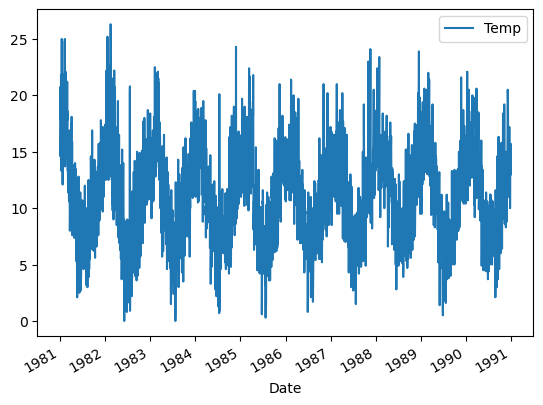

In [7]:
df.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
dftest=adfuller(df["Temp"],autolag='AIC')
dftest

(-4.4233286178952795,
 0.0002698508532064573,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '5%': -2.862336767636517,
  '10%': -2.56719413172842},
 16783.078991354232)

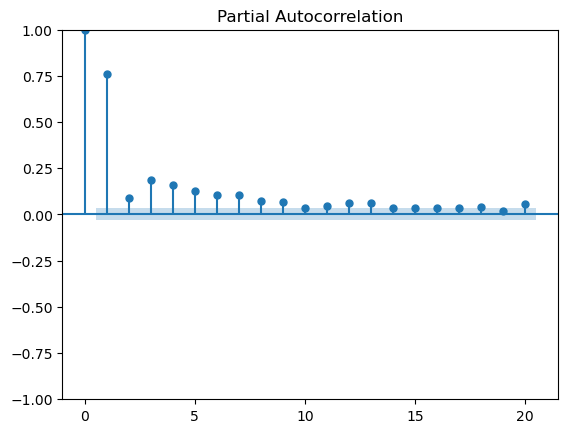

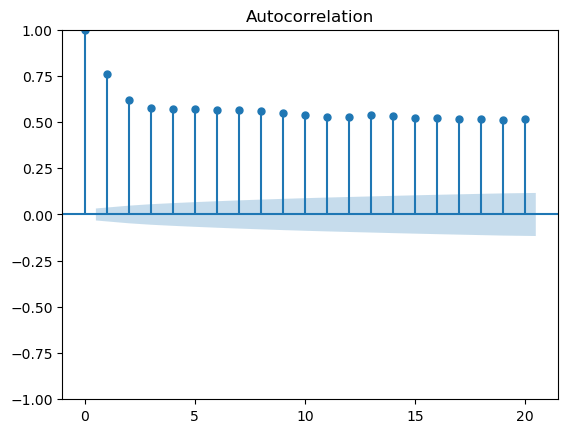

In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.ar_model import AutoReg
pacf=plot_pacf(df.Temp,lags=20)
acf=plot_acf(df.Temp,lags=20)

In [11]:
X=df.values

In [12]:
train=X[:len(X)-7]
test=X[len(X)-7:]

In [13]:
model=AutoReg(train,lags=10)
model=model.fit()

In [14]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8448.843
Method:               Conditional MLE   S.D. of innovations              2.476
Date:                Sun, 22 Sep 2024   AIC                          16921.686
Time:                        10:55:16   BIC                          16996.059
Sample:                            10   HQIC                         16948.178
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9759      0.146      6.698      0.000       0.690       1.262
y.L1           0.5889      0.017     35.510      0.000       0.556       0.621
y.L2          -0.0693      0.019     -3.605      0.0

[11.55706224 12.67035469 13.07800296 13.02039788 12.79995721 12.65800547
 12.43673592]


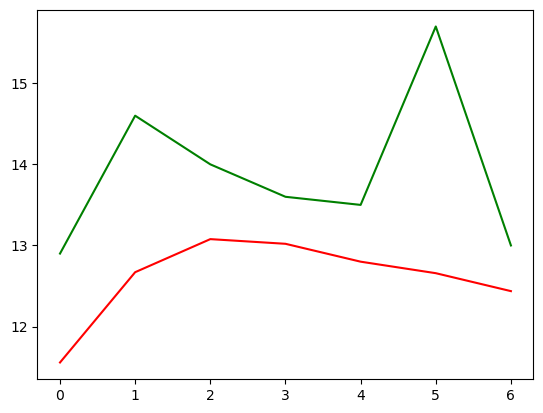

In [15]:
pred=model.predict(start=len(train),end=len(X)-1,dynamic=False)
plt.plot(test,color='green')
plt.plot(pred,color='red')
print(pred)

In [16]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print("RMSE:",rmse)

RMSE: 1.5479981117832813


In [17]:
pred_future=model.predict(start=len(X)+1,end=len(X)+7,dynamic=False)
print(pred_future)
print(len(pred_future))

[12.29193706 12.21405058 12.26025358 12.31091863 12.3116787  12.26846418
 12.21477401]
7
